In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


Questions

1.Demographic stats

2.  What percent of user use different operating systems
 
3.Screen time freequency between different operating system

4.Screen time freequency on basis of gender

5. Battery drain scatter based on gender

6. Battery drain scatter based on Operating system



In [2]:
#Importing of liab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading the data
df=pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")

In [4]:
#Checking data
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [5]:
#Checking data stats
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [6]:
#Checking for null values
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [7]:
#Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
#Setting index
df.index.name="Index"

# DEMOGRAPHICS

(array([81., 64., 73., 74., 60., 66., 65., 58., 77., 82.]),
 array([18. , 22.1, 26.2, 30.3, 34.4, 38.5, 42.6, 46.7, 50.8, 54.9, 59. ]),
 <BarContainer object of 10 artists>)

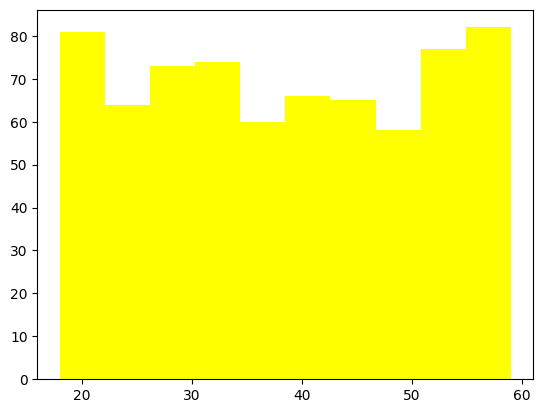

In [9]:
# ANSWER 1 Demographics
plt.hist(df["Age"],color="yellow")

In [10]:
Male=df[df["Gender"]=="Male"]
Female=df[df["Gender"]=="Female"]

In [11]:
gen=df["Gender"].value_counts()

([<matplotlib.patches.Wedge at 0x7f9490c59d20>,
 [Text(-0.06906950569907239, 1.0978294054098232, 'Male'),
  Text(0.06906940291286497, -1.0978294118765723, 'Female')],
 [Text(-0.03767427583585766, 0.5988160393144489, '52.0%'),
  Text(0.03767421977065361, -0.5988160428417666, '48.0%')])

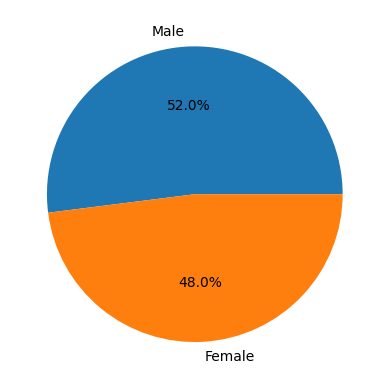

In [23]:
mylabels = ["Male", "Female"]
plt.pie(gen,labels=mylabels,autopct='%.1f%%')

# USER PREFERANCE

In [13]:
os=df["Operating System"].value_counts()

([<matplotlib.patches.Wedge at 0x7f9490dff0a0>,
 [Text(-0.8721875310237399, 0.6702901690512199, 'ANDROID'),
  Text(0.8721875310237396, -0.6702901690512203, 'IOS')],
 [Text(-0.47573865328567627, 0.36561281948248353, '79.1%'),
  Text(0.4757386532856761, -0.36561281948248375, '20.9%')])

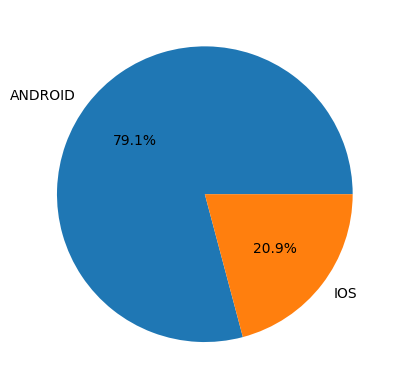

In [22]:
mylabels = ["ANDROID", "IOS"]
plt.pie(os,labels=mylabels,autopct='%.1f%%')

# ANALYSIS

In [15]:
#Analysis 

#Checking how many categories are there in operating system
np.array(pd.Categorical(df['Operating System']).categories)

array(['Android', 'iOS'], dtype=object)

In [16]:
#Seperating os and android data
Ios=df[df["Operating System"]=="iOS"]
Android=df[df["Operating System"]=="Android"]

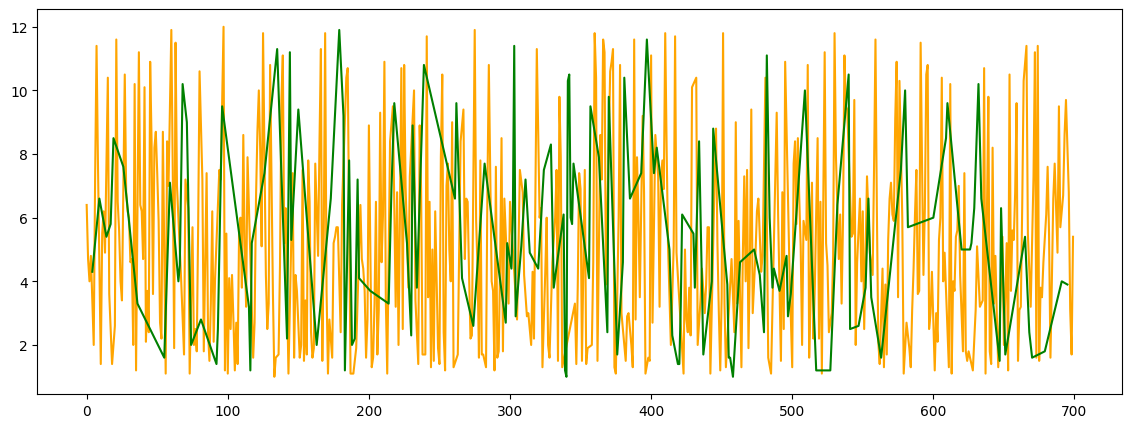

In [17]:
# ANSWER 2 Screen time freequency based on operating system
plt.figure(figsize=(14,5))
plt.plot(Android["Screen On Time (hours/day)"],color="orange")
plt.plot(Ios["Screen On Time (hours/day)"],color="green")

In [18]:
Male=df[df["Gender"]=="Male"]
Female=df[df["Gender"]=="Female"]

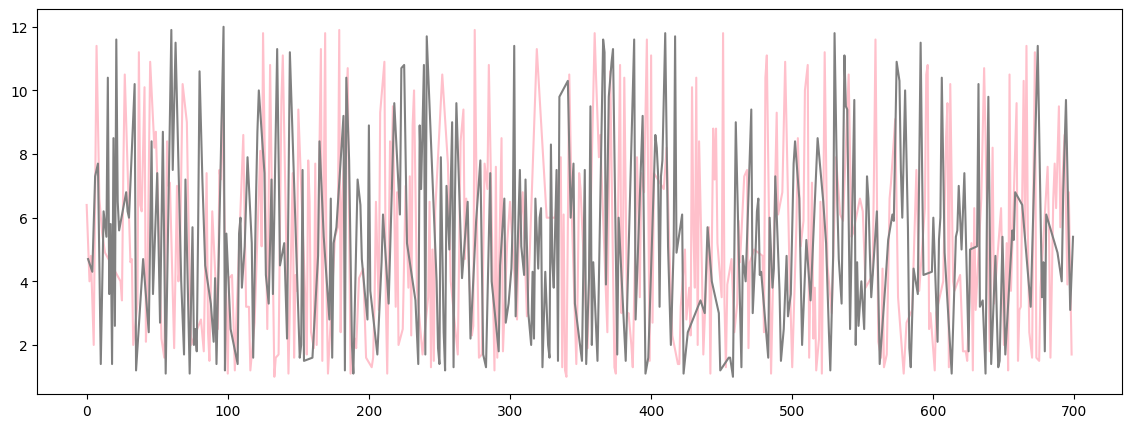

In [19]:
# ANSWER 3 Screen time freequency based on gender
plt.figure(figsize=(14,5))
plt.plot(Male["Screen On Time (hours/day)"],color="pink")
plt.plot(Female["Screen On Time (hours/day)"],color="grey")

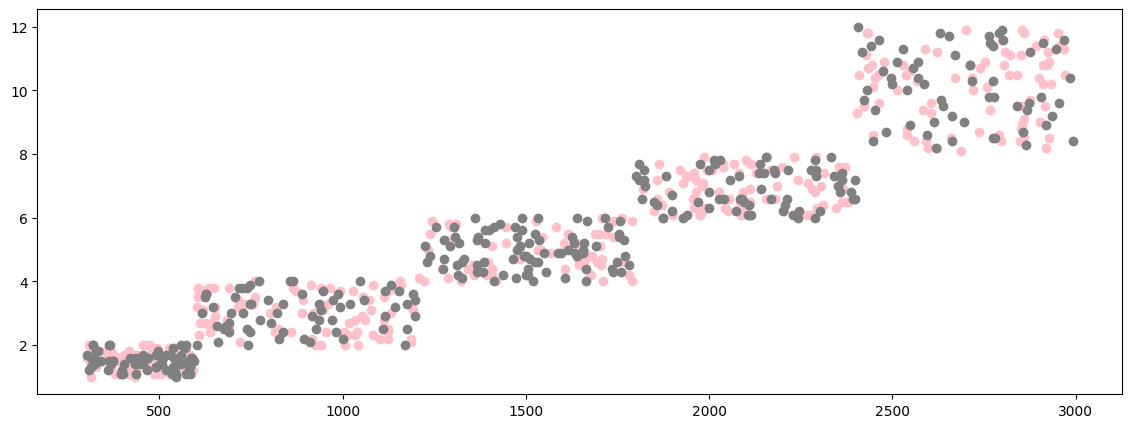

In [20]:
# ANSWER 5 male and female screen time and battery drain
plt.figure(figsize=(14,5))
plt.scatter(Male["Battery Drain (mAh/day)"],Male["Screen On Time (hours/day)"],color="pink")
plt.scatter(Female["Battery Drain (mAh/day)"],Female["Screen On Time (hours/day)"],color="grey")

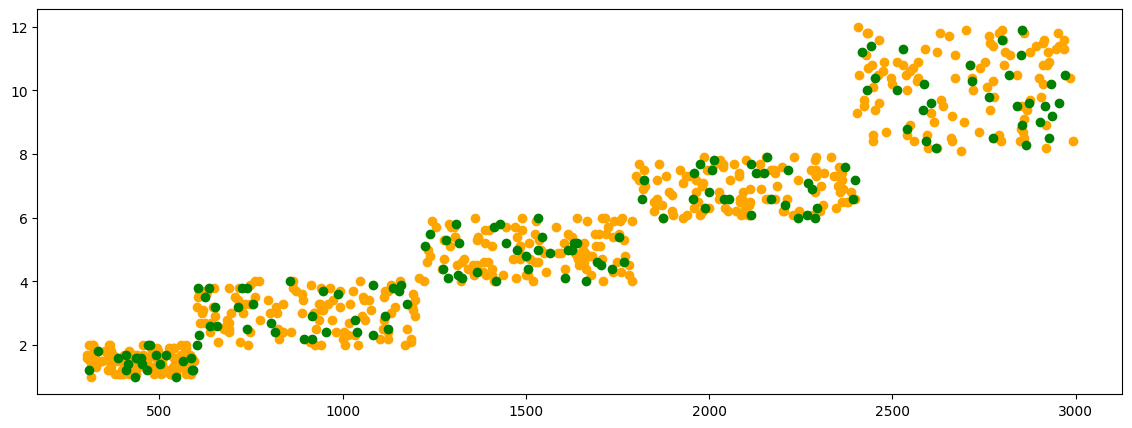

In [21]:
ANSWER 6 operating system screen time and battery drain
plt.figure(figsize=(14,5))
plt.scatter(Android["Battery Drain (mAh/day)"],Android["Screen On Time (hours/day)"],color="orange")
plt.scatter(Ios["Battery Drain (mAh/day)"],Ios["Screen On Time (hours/day)"],color="green")